In [7]:
import pandas as pd
import numpy as np
import json
import ast

***
## Proceso de ETL
***

### **E**xtraction

- La primera parte del proceso consiste en la extraccion de los datos desde su punto de origen, en nuestro caso se encuentran en un conjunto de datasets proporcionados por la empresa steam de tipo json.

In [8]:
games = 'datasets/output_steam_games.json'

# Se lee de cada línea del dataset
rows = []
with open(games) as f:
    for line in f.readlines():
        data = json.loads(line)
        rows.append(data)

# Se convierte a dataframe
games = pd.DataFrame(rows)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [9]:
games.sample()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
43479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
reviews = 'datasets/australian_user_reviews.json'

# Se lee de cada línea del dataset
rows.clear()
with open(reviews) as f:
    for line in f.readlines():
        data = ast.literal_eval(line)
        rows.append(data)

# Se convierte a dataframe
reviews = pd.DataFrame(rows)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [11]:
reviews.sample()

,user_id,user_url,reviews
11474,RexTrigger,http://steamcommunity.com/id/RexTrigger,"[{'funny': '', 'posted': 'Posted June 8, 2014...."


In [12]:
items = 'datasets/australian_users_items.json'

# Se lee de cada línea del dataset
rows.clear()
with open(items) as f:
    for line in f.readlines():
        data = ast.literal_eval(line)
        rows.append(data)

# Se convierte a dataframe
items = pd.DataFrame(rows)
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [13]:
items.sample()

,user_id,items_count,steam_id,user_url,items
7221,PSLOVER9,599,76561198064272615,http://steamcommunity.com/id/PSLOVER9,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."


***
### **T**ransform

- La fase de transformacion aplica una serie de reglas de negocio sobre los datos extraidos para poder limpiarlos y tener una buena calidad de estos al momento de cargarlos, la gravedad de estas transformaciones dependera de como se encuentren los datos extraidos. Segun nuestras tablas se requiere de una normalizacion en ellas y de algunos casting para mayor legibilidad y utilidad al momento de realizar la carga y otras operaciones.

#### *Resolver vacios*

In [14]:
print(f'Campos vacios en games: {games.isna().sum().sum()}')
print(f'Campos vacios en reviews: {reviews.isna().sum().sum()}')
print(f'Campos vacios en items: {items.isna().sum().sum()}')

Campos vacios en games: 1168997
Campos vacios en reviews: 0
Campos vacios en items: 0


In [15]:
#Resolvemos
games.dropna(inplace=True)
print(f'Vacios en games: {games.isna().sum().sum()}')

Vacios en games: 0


#### *Normalizacion de columnas*

#### *Games*

In [16]:
games.sample(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
92084,Digital Dawn Studios,"[Action, Adventure, Indie, Massively Multiplay...",Sirius Online,Sirius Online,http://store.steampowered.com/app/368720/Siriu...,2015-06-01,"[Early Access, Massively Multiplayer, Action, ...",http://steamcommunity.com/app/368720/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,True,368720,Digital Dawn Studios
95717,IQ Publishing,"[Adventure, Casual, Indie]",GRAVEN The Purple Moon Prophecy,GRAVEN The Purple Moon Prophecy,http://store.steampowered.com/app/467490/GRAVE...,2016-09-29,"[Adventure, Indie, Casual, Hidden Object]",http://steamcommunity.com/app/467490/reviews/?...,"[Single-player, Steam Achievements]",9.99,False,467490,Orchid Games
118090,"SEGA, Feral Interactive (Mac), Feral Interacti...",[Strategy],CoH 2 - Soviet Skin: (H) Two Tone Spring Front,CoH 2 - Soviet Skin: (H) Two Tone Spring Front,http://store.steampowered.com/app/249114/CoH_2...,2013-11-12,[Strategy],http://steamcommunity.com/app/249114/reviews/?...,"[Single-player, Multi-player, Downloadable Con...",1.99,False,249114,"Relic Entertainment,Feral Interactive (Mac),Fe..."


In [17]:
print(f"Registro iguales entre la columna app_name y title: {(games['app_name']==games['title']).sum()}")
print(f"Cantidad de registros en el dataframe 'games': {len(games)}")

Registro iguales entre la columna app_name y title: 22179
Cantidad de registros en el dataframe 'games': 22530


La mayoria de los valores de una columna se encuentran en la otra, asi que dejaremos una de las dos para que sirva de referencia total al nombre del videojuego y aprovecharemos para eliminar columnas que no utilizaremos

In [18]:
games.drop(columns=['app_name','specs','early_access','publisher','tags','reviews_url'],inplace=True)

El dataframe posee una columna multivaluada que definitivamente nos conviene desglozar para un mejor uso

In [19]:
games = games.explode('genres')

Alguno valores en la columna price no son nisiquiera de tipo flotante, asi que arreglaremos eso cambiando esos valores y casteando la columna

In [20]:
games['price'] = pd.to_numeric(games['price'],errors='coerce').astype(float)
games['price'].fillna(0,inplace=True)

In [21]:
games[games['price']==0]

,genres,title,url,release_date,price,id,developer
88311,Free to Play,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.0,643980,Secret Level SRL
88311,Indie,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.0,643980,Secret Level SRL
88311,RPG,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.0,643980,Secret Level SRL
88311,Strategy,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.0,643980,Secret Level SRL
88312,Casual,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,0.0,670290,Poolians.com
...,...,...,...,...,...,...,...
120410,Free to Play,忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,0.0,754350,杭州分浪网络科技有限公司
120410,Massively Multiplayer,忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,0.0,754350,杭州分浪网络科技有限公司
120410,RPG,忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,0.0,754350,杭州分浪网络科技有限公司
120410,Strategy,忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,0.0,754350,杭州分浪网络科技有限公司


Ultimo retoque para un futuro merge con la tabla item que nos permita unificar las tres tablas

In [22]:
games.rename(columns={"title":"game_title"},inplace=True)

In [23]:
games['release_date'] = pd.to_datetime(games['release_date'],errors='coerce')
games.dropna(inplace=True)

In [24]:
games.sample()

,genres,game_title,url,release_date,price,id,developer
119731,Adventure,Just Cause 2: Agency Hovercraft,http://store.steampowered.com/app/35090/Just_C...,2010-06-22,0.99,35090,Avalanche Studios


#### *Reviews*

In [25]:
reviews.sample()

,user_id,user_url,reviews
19558,76561198040398338,http://steamcommunity.com/profiles/76561198040...,"[{'funny': '', 'posted': 'Posted December 14, ..."


Otra columna multivaluada

In [26]:
reviews['reviews'].iloc[0]

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [27]:
# Desglosamos
reviews = reviews.explode('reviews')

In [28]:
# Dividimos cada llave de cada diccionario dentro de su propia columna dentro de nuestro dataset
reviews['posted'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['posted'])
reviews['item_id'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['item_id'])
reviews['recommend'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['recommend'])
reviews['review'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['review'])

In [29]:
print(f"Vacios: {reviews.isna().sum().sum()}")
reviews.dropna(inplace=True)
print(f"Vacios: {reviews.isna().sum().sum()}")

Vacios: 140
Vacios: 0


In [30]:
# Eliminamos la sobrante
reviews.drop(columns=['reviews'],inplace=True)

In [31]:
reviews.sample()

,user_id,user_url,posted,item_id,recommend,review
13717,Hawwwk,http://steamcommunity.com/id/Hawwwk,"Posted January 20, 2014.",55230,True,Muito LOL


Las columnas de fechas deberian tener todas un mismo formato

In [32]:
# Dividimos las cadenas de texto en mes dia y año
reviews['posted'] = reviews['posted'].str.replace(',','').str.replace('.','').str.replace('Posted','').str.split()

# Creamos un hashmap para la traduccion de string a numero como referencia del mes 
months = {
  'January': 1,
  'February': 2,
  'March': 3,
  'April': 4,
  'May': 5,
  'June': 6,
  'July': 7,
  'August': 8,
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}
# Array para añadir cada registro ya traducido posteriormente al dataframe
dates=[]
for i,x in enumerate(reviews.itertuples()): # Se itera los registros

  if len(x.posted)==3: # Si el campo posee todo los campos encesarios para tener una fecha entonces se declara la fecha
    date = f"{x.posted[2]}-{months[x.posted[0]]}-{x.posted[1]}" 
  else: 
    date = np.nan

  dates.append(pd.to_datetime(date).date())

reviews['posted'] = pd.DataFrame(dates) # Se añaden a la columna del dataframe

#### *Feature Engineering*

Para una consulta en nuestra API vamos a necesitar una nueva columna que nos especifique cual es el sentimiento que emerge de las palabras de las reviews de los usuarios. Para eso utilizaremos una libreria famosa para el procesamiento de lenguaje natural que nos colaborara en el proceso. 

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SID = SentimentIntensityAnalyzer()
analysis = []

for x in reviews.itertuples():
  sentiment = SID.polarity_scores(x.review)['compound']
  if sentiment<-.2:
    value = 0
  elif sentiment>.2:
    value = 2
  else:
    value = 1
  analysis.append(value)

reviews['sentiment'] = pd.DataFrame(analysis)

In [34]:
reviews.sample()

,user_id,user_url,posted,item_id,recommend,review,sentiment
2866,jason2305,http://steamcommunity.com/id/jason2305,2013-11-25,254200,False,2/10 -dumb as ♥♥♥♥,1


#### *Items*

In [35]:
items.sample()

,user_id,items_count,steam_id,user_url,items
75955,76561198084325071,11,76561198084325071,http://steamcommunity.com/profiles/76561198084...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te..."


Otra columna multivariada

In [36]:
# Se divide las listas por registro
items = items.explode('items')

In [37]:
# Dividimos cada llave de cada diccionario dentro de su propia columna dentro de nuestro dataset
items['item_id'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['item_id'])
items['item_name'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['item_name'])
items['playtime_forever'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['playtime_forever'])

In [38]:
# Validamos vacios
print(f"Vacios: {items.isna().sum().sum()}")
items.dropna(inplace=True)
print(f"Vacios: {items.isna().sum().sum()}")

Vacios: 67224
Vacios: 0


In [39]:
# Eliminamos columnas innecesarias
items.drop(columns=['items','steam_id','items_count','user_url'],inplace=True)

In [40]:
# Retoque final para el merge con la tabla games
items.rename(columns={"item_name":"game_title"},inplace=True)

In [41]:
items.sample()

,user_id,item_id,game_title,playtime_forever
10512,76561198057263232,550,Left 4 Dead 2,113.0


***
### **L**oad
- Como cereza del pastel debemos cargar nuestros datos ya procesados a un sistema de origen. Este sistema dependera bastante de los requisitos de la organizacion y varia segun sus objetivos. Para este proyecto la carga se hara directamente en la Web mediante una API y en esta ocasion exportaremos solo parte de nuestro gran dataset, por cuestion de rendimiento, eficiencia y funcionamiento de la aplicacion que utilizaremos para el despliegue, Render. Para ser mas claros estos servicios poseen una prueba gratuita pero bastante limitada en cuestion de memoria.

In [42]:
game_item = pd.merge(games,items,on='game_title')
game_item.drop(columns=['game_title','url','id','item_id'],inplace=True)
game_item['release_date'] = pd.to_datetime(game_item['release_date']).dt.year

In [43]:
game_item.sample()

,genres,release_date,price,developer,user_id,playtime_forever
3641640,Indie,2016,14.99,Gaming Corps AB,CSMisBeast,0.0


In [44]:
reviews_items = pd.merge(reviews,items[['item_id','game_title']].drop_duplicates(),on='item_id')
reviews_items.dropna(inplace=True)

In [45]:
all_dfs = pd.merge(reviews_items, games[['game_title','developer','id','url','price']].drop_duplicates(), on='game_title')
all_dfs.dropna(inplace=True)

In [46]:
all_dfs.sample()

,user_id,user_url,posted,item_id,recommend,review,sentiment,game_title,developer,id,url,price
27988,SethSentry,http://steamcommunity.com/id/SethSentry,2014-11-03,244730,True,"It's a game where you dive and kick, you just ...",2,Divekick,"Iron Galaxy Studios, LLC",244730,http://store.steampowered.com/app/244730/Divek...,4.99


In [47]:
game_item[:len(game_item)//2].to_parquet('./clean_datasets/game_items.parquet')
all_dfs.to_parquet('./clean_datasets/all_dfs.parquet')

c:\Users\jmoc9\anaconda3\envs\pi\Lib\site-packages\pyarrow\pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [48]:
def developer(developer:str):
  '''
  Devuelve la cantidad de items y el porcentaje de contenido Free por año
  segun empresa desarrolladora.
  '''
  df = game_item[game_item['developer']==developer]
  items = df.groupby('release_date')['developer'].count().reset_index()
  free = df[df['price']==0].groupby('release_date')['developer'].count().reset_index()
  
  
  rows = []
  merge = pd.merge(free,items,on='release_date')
  for x in items.itertuples():
    if x.release_date in list(merge['release_date']):
      free_content = round((merge[merge['release_date']==x.release_date]['developer_x']/x.developer)*100,2).item()
    else:
      free_content = 0
    
    rows.append({"Año":x.release_date,"Cantidad de items":x.developer,"Contenido Free":f"{free_content}%"})
  res = {
    developer:rows
  }
  return res

In [49]:
developer('Valve')

{'Valve': [{'Año': 1998, 'Cantidad de items': 7750, 'Contenido Free': '0%'},
  {'Año': 1999, 'Cantidad de items': 6334, 'Contenido Free': '0%'},
  {'Año': 2000, 'Cantidad de items': 13044, 'Contenido Free': '0%'},
  {'Año': 2001, 'Cantidad de items': 3274, 'Contenido Free': '0%'},
  {'Año': 2003, 'Cantidad de items': 3465, 'Contenido Free': '0%'},
  {'Año': 2004, 'Cantidad de items': 72060, 'Contenido Free': '0%'},
  {'Año': 2006, 'Cantidad de items': 26602, 'Contenido Free': '0%'},
  {'Año': 2007, 'Cantidad de items': 31834, 'Contenido Free': '0%'},
  {'Año': 2008, 'Cantidad de items': 6585, 'Contenido Free': '0%'},
  {'Año': 2009, 'Cantidad de items': 37044, 'Contenido Free': '0%'},
  {'Año': 2010, 'Cantidad de items': 4978, 'Contenido Free': '0%'},
  {'Año': 2011, 'Cantidad de items': 48930, 'Contenido Free': '0%'},
  {'Año': 2012, 'Cantidad de items': 43776, 'Contenido Free': '0%'}]}

In [50]:
def user_data(user_id:str):
  '''
  Devuelve la cantidad de dinero gastado por el usuario mas el 
  porcentaje de recomendacion y la cantidad de items
  '''
  df = all_dfs[all_dfs['user_id']==user_id]
  money = df['price'].sum()
  items = len(df)

  user_reviews = df[df['user_id']==user_id]
  recommendation = (user_reviews['recommend'].sum()/len(user_reviews))*100

  res = {
    "Usuario X": user_id,
    "Dinero gastado": round(money,2),
    "% de recomendacion": f"{round(recommendation,2)}%",
    "Cantidad de items": items
  }

  return  res


In [51]:
user_data('Shredderman962')

{'Usuario X': 'Shredderman962',
 'Dinero gastado': 109.92,
 '% de recomendacion': '75.0%',
 'Cantidad de items': 8}

In [275]:
def user_for_genre(genre:str):
  '''
  Devuelve el usuario con mas horas jugadas para el genero dado 
  y una lista de acumulaciones de horas jugadas por año
  '''
  df = game_item[game_item['genres']==genre]

  user = df.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False).index[0]
  hours = df[df['user_id']==user].groupby('release_date')['playtime_forever'].sum()

  year = []
  for i,x in enumerate(hours):
    if x!=0:
      year.append({"Año":hours.index[i].item(),"Horas":int(x)})

  res = {
    "Usuario con mas horas jugadas para Genero":user,
    "Horas Jugadas": year
  }
  return res

In [276]:
user_for_genre('Adventure')

{'Usuario con mas horas jugadas para Genero': 'REBAS_AS_F-T',
 'Horas Jugadas': [{'Año': 2003, 'Horas': 1863},
  {'Año': 2005, 'Horas': 1113},
  {'Año': 2008, 'Horas': 1241},
  {'Año': 2009, 'Horas': 16913},
  {'Año': 2010, 'Horas': 16069},
  {'Año': 2011, 'Horas': 54983},
  {'Año': 2012, 'Horas': 107829},
  {'Año': 2013, 'Horas': 205688},
  {'Año': 2014, 'Horas': 154961},
  {'Año': 2015, 'Horas': 575410},
  {'Año': 2016, 'Horas': 713970},
  {'Año': 2017, 'Horas': 32620}]}

In [54]:
def best_developer_year(year:int):
  '''
  Devuelve el top 3 de desarrolladores con juegos mas recomendados por usuarios para el año dado.
  '''
  df = all_dfs[pd.to_datetime(all_dfs['posted']).dt.year == int(year)].copy()
  df['posted'] = pd.to_datetime(df['posted']).dt.year
  recommendation = df.groupby('developer')['recommend'].sum().sort_values(ascending=False)[:3]
  
  res = {
    "Año":year,
    "Res":[
      {"Puesto 1":recommendation.index[0]},
      {"Puesto 2":recommendation.index[1]},
      {"Puesto 3":recommendation.index[2]}
    ]
  }
  return res

In [55]:
best_developer_year(2015)

{'Año': 2015,
 'Res': [{'Puesto 1': 'Valve'},
  {'Puesto 2': 'Facepunch Studios'},
  {'Puesto 3': 'Smartly Dressed Games'}]}

In [56]:
def developer_reviews_analysis(developer:str):
  '''
  Devuelve un diccionario con el nombre del desarrollador como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un analisis de sentimiento como valor positivo o negativo.
  '''
  df = all_dfs[all_dfs['developer']==developer].copy()
  sentiments = df['sentiment'].value_counts()
  res = {
    developer:{
      "Negative":sentiments.values[2], 
      "Positive":sentiments.values[0]
    }
  }
  return res

In [57]:
developer_reviews_analysis('Re-Logic')

{'Re-Logic': {'Negative': 90, 'Positive': 352}}

***
### **EDA**
***

Tenemos las funciones listas junto a nuestro sistema de recomendacion dentro de la api ya disponible en la nube, pero que hay de los datos en si? realmente tienen cierto sentido o patron dentro del sistema? y los outliers? Bueno, miraremos un poco esto resolviendo un par de preguntas respecto a los datos que nos suministran algunas tablas:
- Cual es el genero mas frecuente dentro de la plataforma?
- Cuales son los videojuegos mas apreciados por la comunidad?
- Existe una relacion entre las reviews y sus años de publicacion?
- Cual es el margen o rango entre los precios de los juegos dentro de la plataforma? 

***
##### *Cual es el genero mas frecuente dentro de la plataforma?*

In [58]:
import matplotlib.pyplot as plt

In [250]:
# Miramos nuestra tabla a utilizar
games.sample()

,genres,game_title,url,release_date,price,id,developer
112609,Action,Toro,http://store.steampowered.com/app/416720/Toro/,2016-01-26,2.99,416720,Recotechnology S.L.


In [61]:
# Agrupamos y ordenamos utilizando la columna genero y id
top_genre = games.groupby('genres').count().reset_index()[['genres','id']].sort_values(by='id',ascending=True)[-10:]
top_genre

,genres,id
16,Sports,1029
6,Early Access,1356
8,Free to Play,1454
12,RPG,3801
14,Simulation,4720
17,Strategy,5206
4,Casual,6276
1,Adventure,7011
0,Action,9412
9,Indie,12680


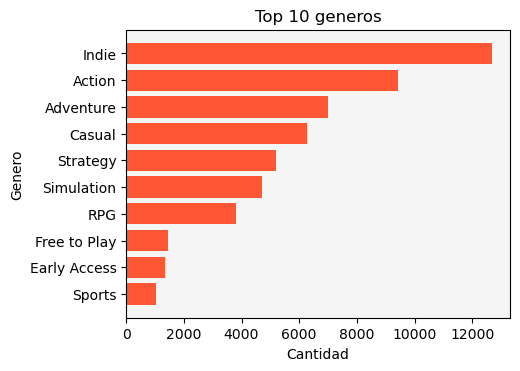

In [62]:
# Configuramos la grafica
plt.barh(top_genre['genres'], top_genre['id'], color='#FF5733') 
plt.xlabel('Cantidad')
plt.ylabel('Genero')
plt.title('Top 10 generos')
# Ajustamos detalles
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.gca().set_facecolor('whitesmoke') 
# Printeamos
plt.show()

- El *genero* que mas se presenta dentro de los videojuegos en steam es el **Indie** con un total de **12680** apariciones.

***
##### *Cuales son los videojuegos mas apreciados por la comunidad?*

- La manera en como cuantificaremos el *aprecio* de los usuarios respecto a un videojuego va a ser respecto a que tanto recomiendan estos el producto en si mismo.

In [66]:
# Se agrupan, ordenan y seleccionan los datos relevantes
top_games = all_dfs.groupby('game_title')['recommend'].sum().sort_values(ascending=True)[-10:]
top_games

game_title
Portal 2                             292
DayZ                                 438
Borderlands 2                        443
Warframe                             451
Rust                                 565
Left 4 Dead 2                        578
Terraria                             581
Unturned                             755
Garry's Mod                         1343
Counter-Strike: Global Offensive    2760
Name: recommend, dtype: object

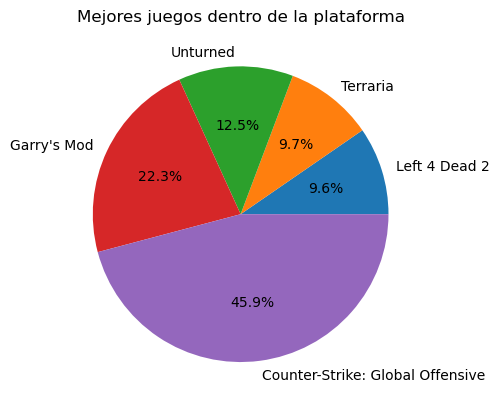

In [254]:
# Se printean porcentajes
fig, ax = plt.subplots()
ax.pie(top_games[-5:],labels=top_games.index[-5:],autopct='%1.1f%%')
plt.title('Mejores juegos dentro de la plataforma')
plt.show()

***
##### *Existe una relacion entre las reviews y sus años de publicacion?*

In [144]:
# Se hace un ajuste del dataframe original para evitar datos extra que no necesitamos
s_through_years = all_dfs[['game_title','sentiment','posted']].drop_duplicates().copy()
s_through_years['posted'] = pd.to_datetime(s_through_years['posted']).dt.year

In [145]:
# El respectivo binning de los datos
group = s_through_years.groupby('posted')['sentiment'].value_counts()
df_group = pd.DataFrame(group).reset_index()

In [147]:
#Vistazo de los datos agrupados
df_group

,posted,sentiment,count
0,2010,2,29
1,2010,1,17
2,2010,0,4
3,2011,2,261
4,2011,1,59
5,2011,0,33
6,2012,2,501
7,2012,1,184
8,2012,0,108
9,2013,2,2178


In [146]:
# Dividimos nuestro df y hacemos un filtrado para dividir los sentimientos en distintan tablas
good = df_group[df_group['sentiment']==2]
neutral = df_group[df_group['sentiment']==1]
bad = df_group[df_group['sentiment']==0]

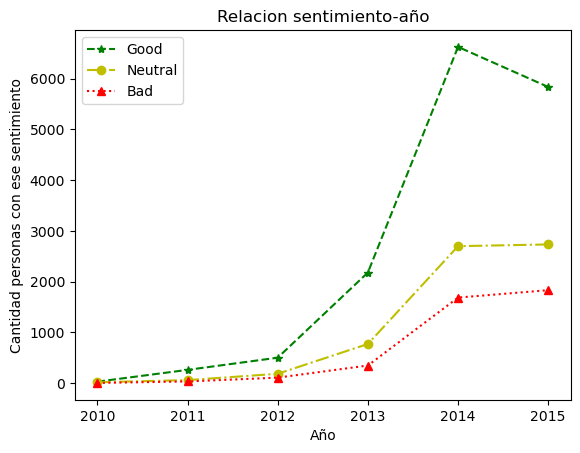

In [148]:
# Configuramos las pendientes para una buena ilustracion
plt.plot(good['posted'],good['count'], linestyle='--',marker='*', label='Good',color='g')
plt.plot(neutral['posted'],neutral['count'],linestyle='-.',marker='o',label='Neutral',color='y')
plt.plot(bad['posted'],bad['count'],linestyle=':',marker='^',label='Bad', color='r')
# Configuramos datos dentro de la grafica
plt.title('Relacion sentimiento-año')
plt.xlabel('Año')
plt.ylabel('Cantidad personas con ese sentimiento')
plt.legend()
# Printeamos
plt.show()

- Como podemos ver realmente no hay mucha cambio entre los datos durante el transcurso del tiempo aparte de su aumento de volumen a travez de los años que a su vez representa el aumento en el volumen usuarios que entran a la plataforma y de ese pequeño decrecimiento entre el 2014 y el 2015

***
##### *Cual es el rango entre los precios de los juegos dentro de la plataforma?* 

- Queremos saber si todos los precios de los juegos realmente respetan un margen a pesar de la libertad que se le da a los desarrolladores para asignarles un valor. 

In [243]:
# Se eligen los datos que queremos y revisamos su distribucion
prices = all_dfs[['game_title','price']].drop_duplicates()
prices.describe()

,price
count,1936.000000
mean,11.619509
std,20.673467
min,0.000000
25%,3.990000
50%,9.990000
75%,14.990000
max,771.710000


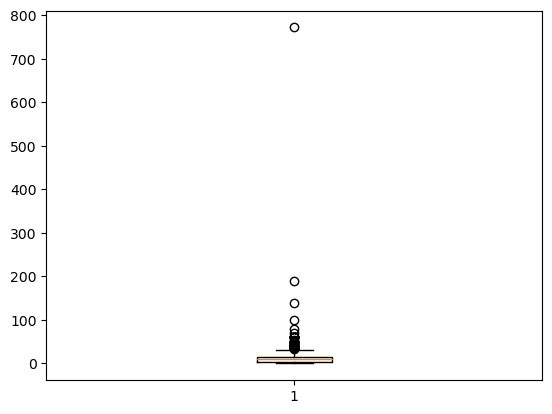

In [244]:
# Vistazo rapido de su distribucion
boxplot = plt.boxplot(prices['price'])
outliers = boxplot['fliers'][0].get_data()[1]
plt.show()

In [245]:
# Se consiguen los outliers de la grafica
outliers = pd.Series(outliers).sort_values(ascending=True)

In [246]:
# Se omiten los outliers dentro de la columna original
prices = prices[prices['price'] < outliers[0]]

In [247]:
prices.describe()

,price
count,1873.000000
mean,9.932931
std,7.836136
min,0.000000
25%,3.990000
50%,9.990000
75%,14.990000
max,34.990000


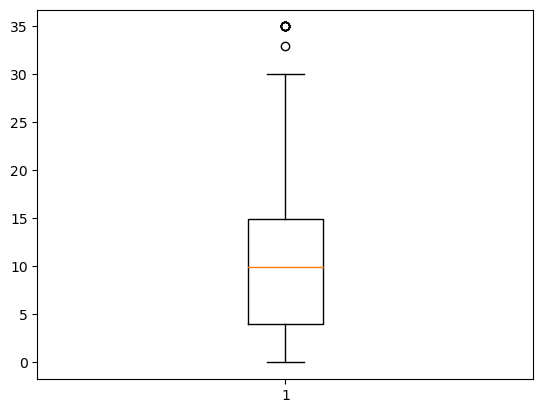

In [248]:
# Vistazo final
plt.boxplot(prices['price'])
plt.show()

Figense que aunque la mayoria de precios respetaban un rango entre 16.0 y 4.0 existian bastantes mas datos que sobrepasaban este margen y otros muy especificos que se alejaban demasiado de un maximo, en nuestro caso un juego que valia 771 dolares. Estos son registros que pueden llegar a alterar un monton nuestro promedio y distribuciones dentro de nuestros datos, lo cual los hace candidatos perfectos para excluirlos de nuestras tablas y trabajar con datos mas racionales.